In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import math

In [2]:
def part_a(fs,T,n):
    ts = 1/fs;
    x = np.empty([n, int(T/ts)])
    for i in range(n):
        num = np.random.randint(2);
        if num == 0:
            num = -1
        else:
            num = 1
        row = np.full((1, int(T/ts)), num)
        x[i] = row;
    
    #plotting
    y_axis = np.reshape(x,(n*int(T/ts),1))
    x_axis = np.arange(0,n,ts/T)
    plt.plot(x_axis,y_axis);
    plt.title('NRZL Scheme')
    plt.show()
    return y_axis;

In [3]:
def part_b(T, n, samples):
    
    x = np.empty([experiments,int(n*fs*T)]) 
    for j in range(experiments):
        temp = np.empty([n, int(fs*T)])

        for i in range(n):
            num = np.random.randint(2);
            if num == 0:
                num = -1
            else:
                num = 1
            row = np.full((1, int(fs*T)), num)
            temp[i] = row;
        temp = np.reshape(temp,(n*int(fs*T),1))
        temp = np.transpose(temp)
        x[j] = temp;
    
    x = np.transpose(x)
    
    mean_array = np.mean(x,axis = 1)
    plt.stem(mean_array)
    plt.title('NRZ-L Scheme Mean')
    plt.show

    correlation_coefficient = np.corrcoef(x);
    
    plt.figure(figsize=(16, 16))
    plt.title(r'Heatmap of correlation')
    sn.heatmap(correlation_coefficient, cmap='crest')
    plt.show
    x = np.transpose(x)
    return x;

In [4]:
def part_c(T, n, fs, x, nrzl):
    nrzl_shifted = np.empty([n, int(fs*T)])
    d = np.random.uniform(0,T)
    
    plt.figure()
    x_axis = np.arange(0,n,1/(T*fs))
    plt.plot(x_axis,nrzl, color = 'g', label = 'NRZL-scheme')
    
    nrzl_shifted = np.zeros((int(n*fs*T)))
    start = math.ceil(d*fs)
    print(start)
    for i in range(start, int(n*fs*T)):
        #print(i,i - start - 1)
        nrzl_shifted[i] = nrzl[i - start] 
    
    #plotting
    plt.plot(x_axis,nrzl_shifted, color = 'b', label = 'Shifted NRZL-scheme')
    plt.legend()
    plt.show
    
    x_minus_d = np.zeros((experiments,int(n*fs*T)))
        
    for i in range(experiments):
        d = np.random.uniform(0,T) 
        start = math.ceil((d*fs))
        for j in range(start, int(n*fs*T)):
            x_minus_d[i,j] = x[i,j - start]
    
    y_mean = np.mean(np.transpose(x_minus_d),axis = 1)
    plt.figure()
    plt.title(r'Mean of shifted NRZL scheme')
    plt.plot(x_axis,y_mean)
    
    plt.figure()
    plt.title(r'Mean Histogram')
    plt.hist(y_mean)
    
    autocorrelation = np.corrcoef(np.transpose(x_minus_d));
    plt.figure(figsize=(16, 16))
    plt.title(r'Heatmap of correlation')
    sn.heatmap(autocorrelation, cmap='crest')
    plt.show();
    return x_minus_d

In [5]:
def part_d(experiments,T, n, fs, x, x_minus_d):
    y_fft = abs(np.fft.rfft(x_minus_d))
    y_squared = np.square(y_fft)
    y_mean_3 = (np.mean(y_squared,axis = 1))/(T*fs*experiments)
    y_mean = (np.mean(y_squared,axis = 0))/(T*fs*experiments)
    calculated_psd = np.mean(y_mean_3);
    freq = np.linspace(0, fs/(2*T), int(n*T*fs/2) + 1)
    
    print("Calculated PSD = ",calculated_psd)
    
    plt.figure()
    plt.title('PSD for shifted NRZL')
    plt.xlabel('Frequency');
    plt.ylabel('Power Spectral Density in (W/Hz)')
    plt.plot(freq, y_mean, color = 'green')
    plt.show()
    
    plt.figure()
    plt.title('Calculated PSD for Shifted NRZL')
    plt.plot(y_mean_3, color = 'green', label='Mean with each experiment')
    plt.axhline(y=calculated_psd, color='r', linestyle='-', label = 'Calculated PSD')
    plt.legend()
    plt.show()
    
    y_fft = abs(np.fft.rfft(x))
    y_squared = np.square(y_fft)
    y_mean_3 = (np.mean(y_squared,axis = 1))/(T*fs*experiments)
    y_mean = (np.mean(y_squared,axis = 0))/(T*fs*experiments)
    calculated_psd = np.mean(y_mean_3);
    freq = np.linspace(0, fs/(2*T), int(n*T*fs/2) + 1)
    
    plt.figure()
    plt.title('PSD for non-shifted NRZL')
    plt.xlabel('Frequency');
    plt.ylabel('Power Spectral Density in (W/Hz)')
    plt.plot(freq, y_mean, color = 'green')
    plt.show()
    
    print("Calculated PSD = ",calculated_psd)
    plt.figure()
    plt.title('Calculated PSD for non-shifted NRZL')
    plt.plot(y_mean_3, color = 'green', label='Mean with each experiment')
    plt.axhline(y=calculated_psd, color='r', linestyle='-', label = 'Calculated PSD')
    plt.legend()
    plt.show()

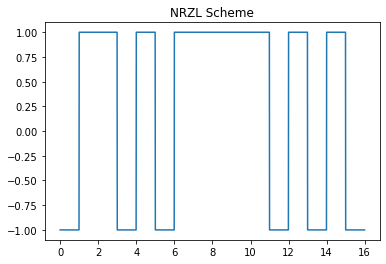

23


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


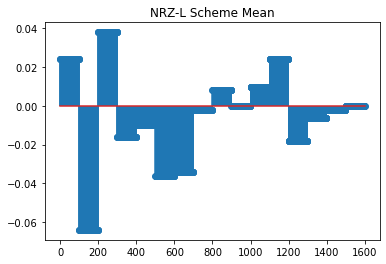

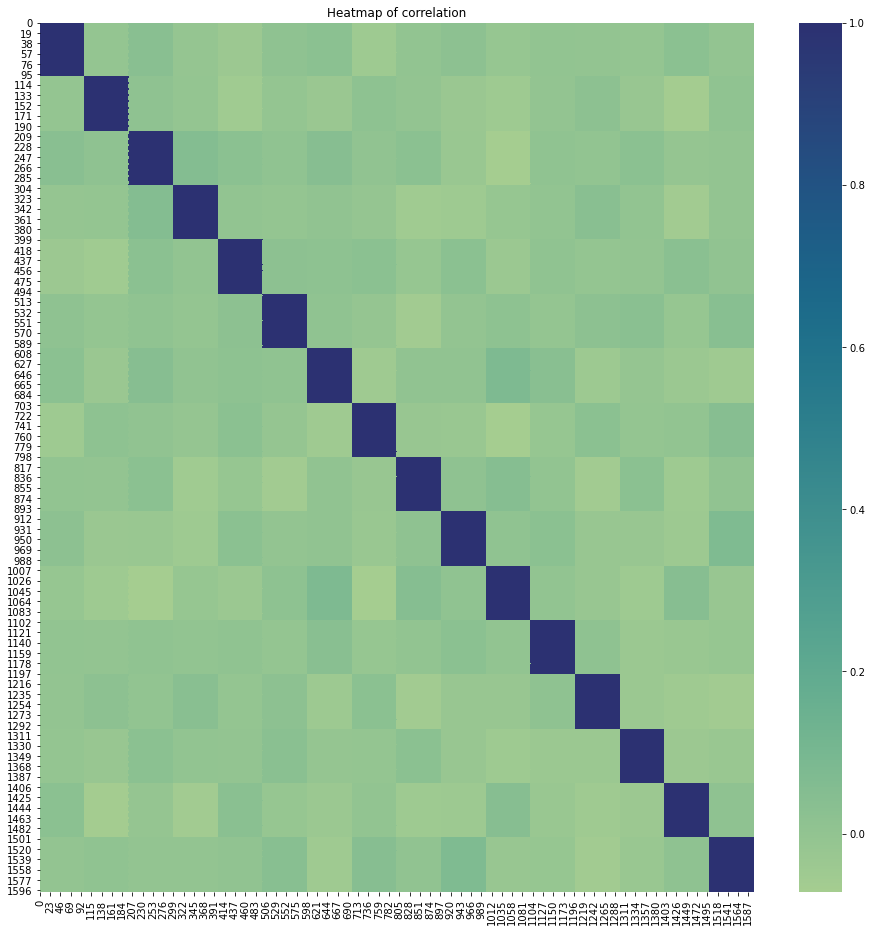

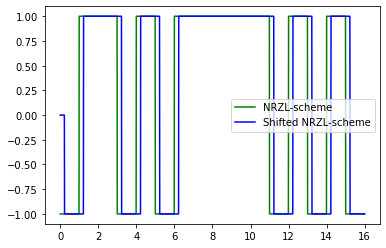

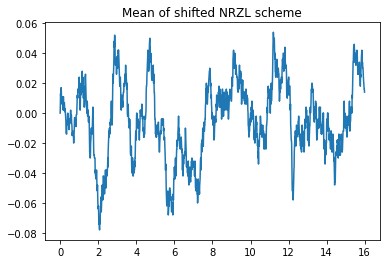

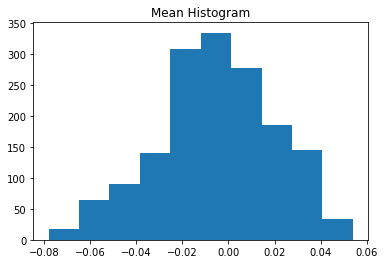

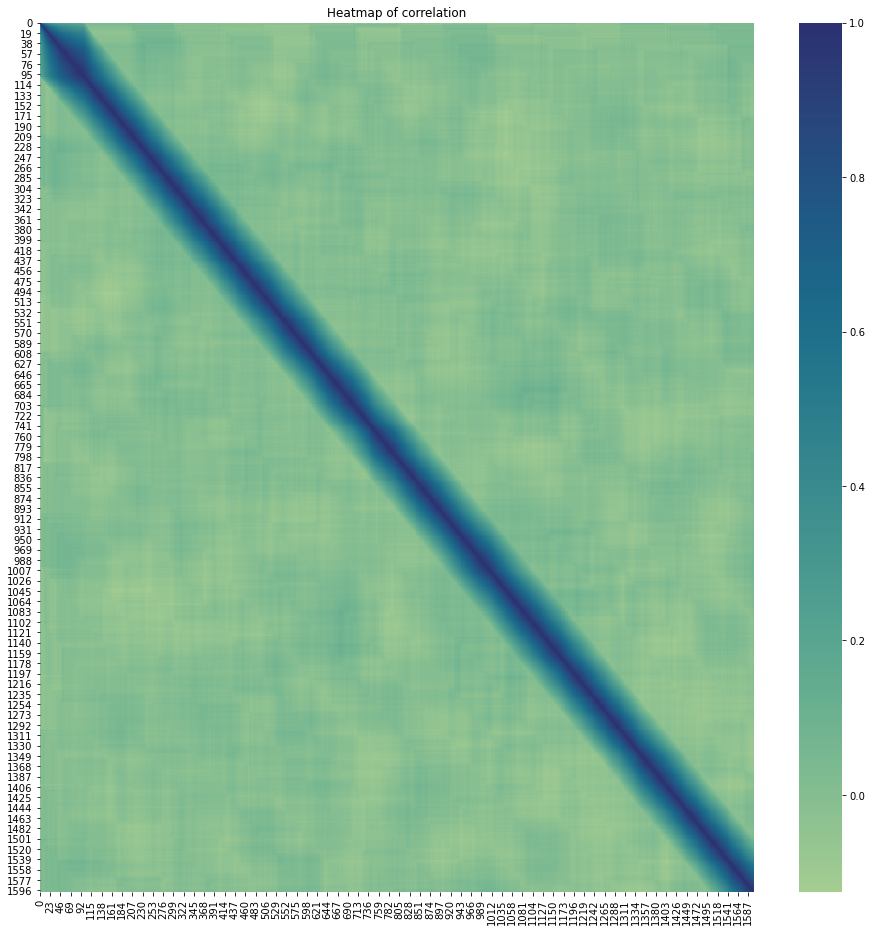

Calculated PSD =  0.01636262770287141


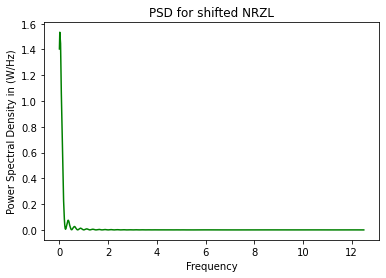

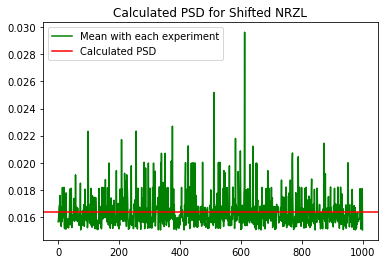

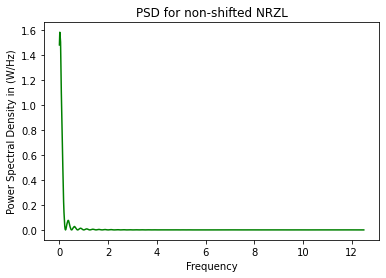

Calculated PSD =  0.016905867665418225


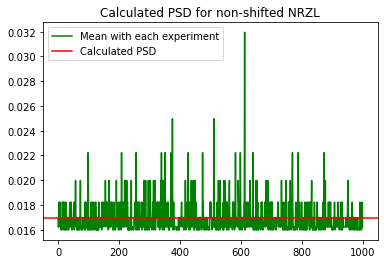

In [6]:
fs=50
T=2
n=16
experiments = 1000;
nrzl = part_a(fs,T,n)
x = part_b(T,n,experiments)
x_minus_d = part_c( T, n, fs, x, nrzl)
part_d(experiments, T, n, fs, x, x_minus_d)

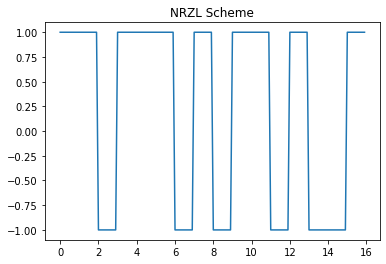

2


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


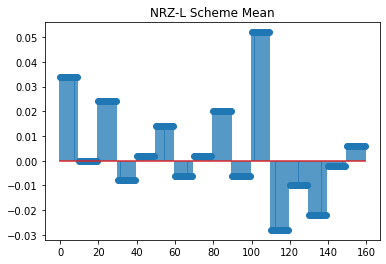

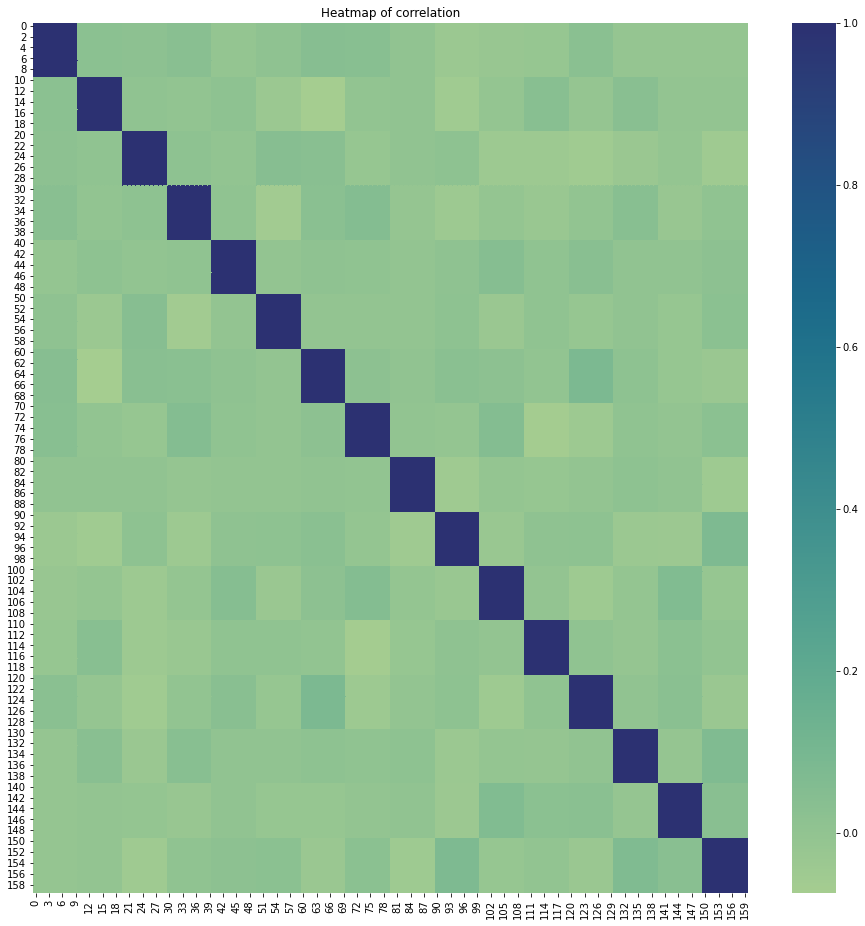

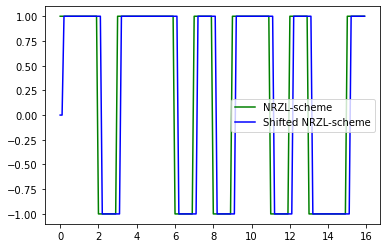

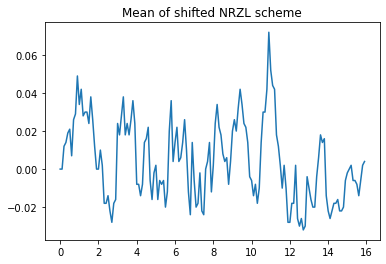

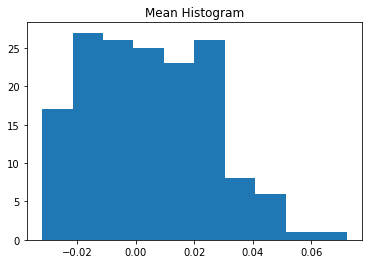

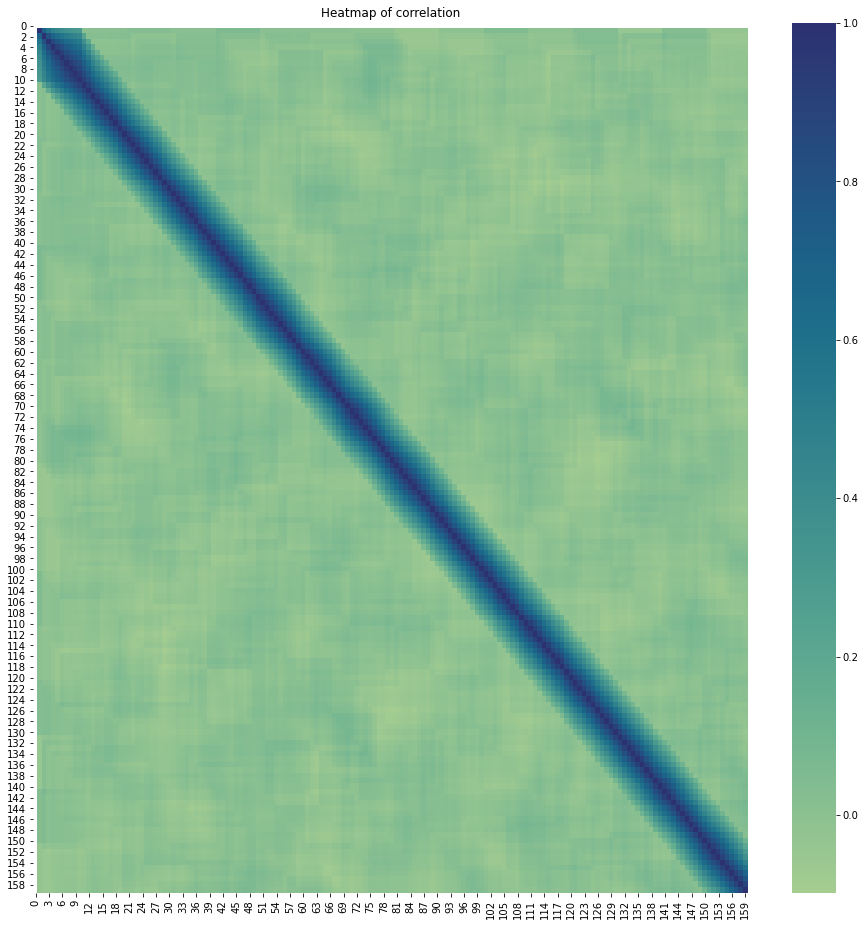

Calculated PSD =  0.01618514938271605


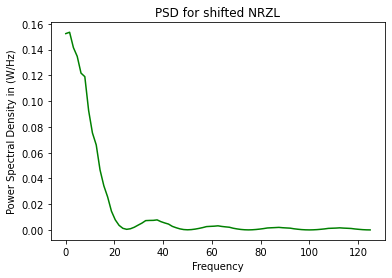

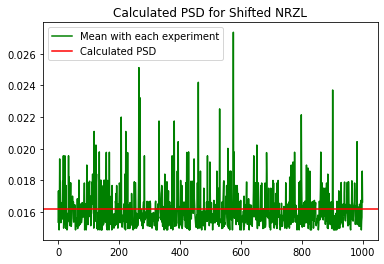

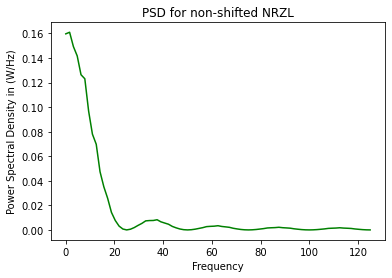

Calculated PSD =  0.01678814814814815


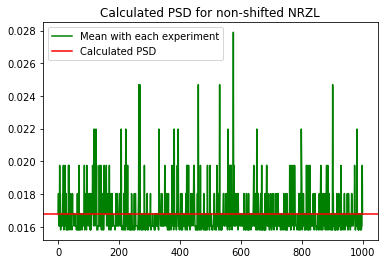

In [7]:
fs=50
T=0.2
n=16
experiments = 1000;
nrzl = part_a(fs,T,n)
x = part_b(T,n,experiments)
x_minus_d = part_c( T, n, fs, x, nrzl)
part_d(experiments, T, n, fs, x, x_minus_d)